In [28]:
import pandas as pd
import os
from copy import deepcopy
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Sample 25 Million records EDA

In [2]:
df = pd.read_parquet('dataframe.parquet')

In [3]:
movies = pd.read_csv('/Users/bhargavdevarapalli/Documents/Brain_Station_Final_Project/DATA/movie_titles.csv',
                      names = ['MOVIE_ID', 'YEAR', 'NAME']
                      ,encoding='ISO-8859-1',on_bad_lines='skip')

In [4]:
movies['YEAR']  = movies['YEAR'].replace([np.inf, -np.inf], np.nan)
movies['YEAR']  = movies['YEAR'].fillna(0)
movies['YEAR']  =  movies['YEAR'].astype(int)

## Movie Trends per Year 

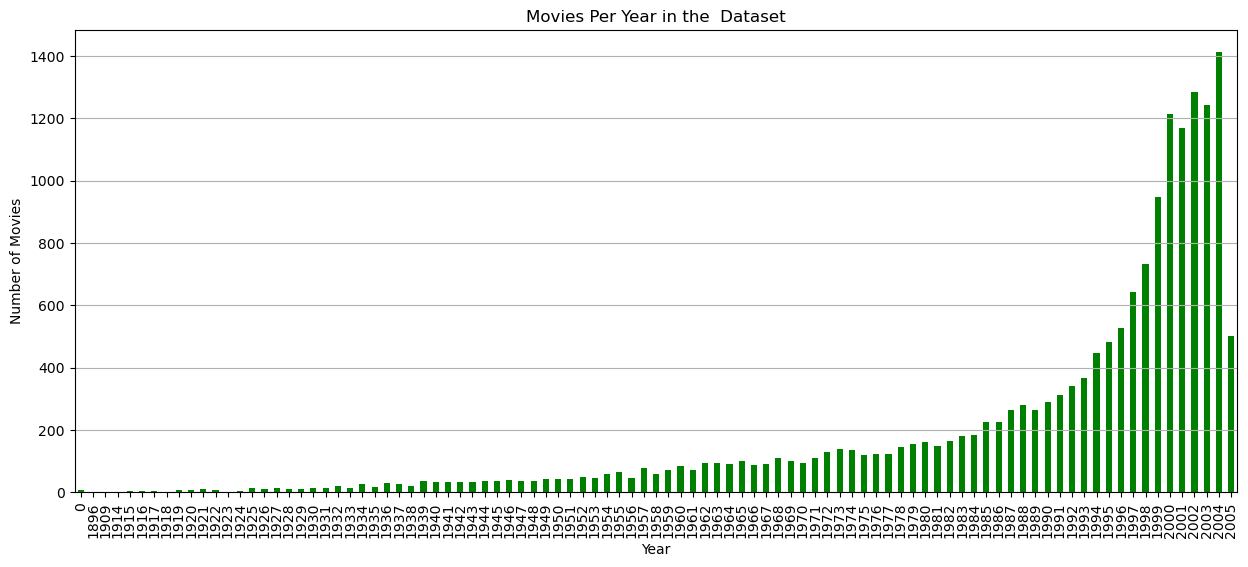

In [5]:

plt.figure(figsize=(15, 6))
movies['YEAR'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Movies Per Year in the  Dataset')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Show the plot
plt.show()

##### Total Number of movies released over the years grow exponentially 

## Sample User Trends per Year based on one sample file loaded 

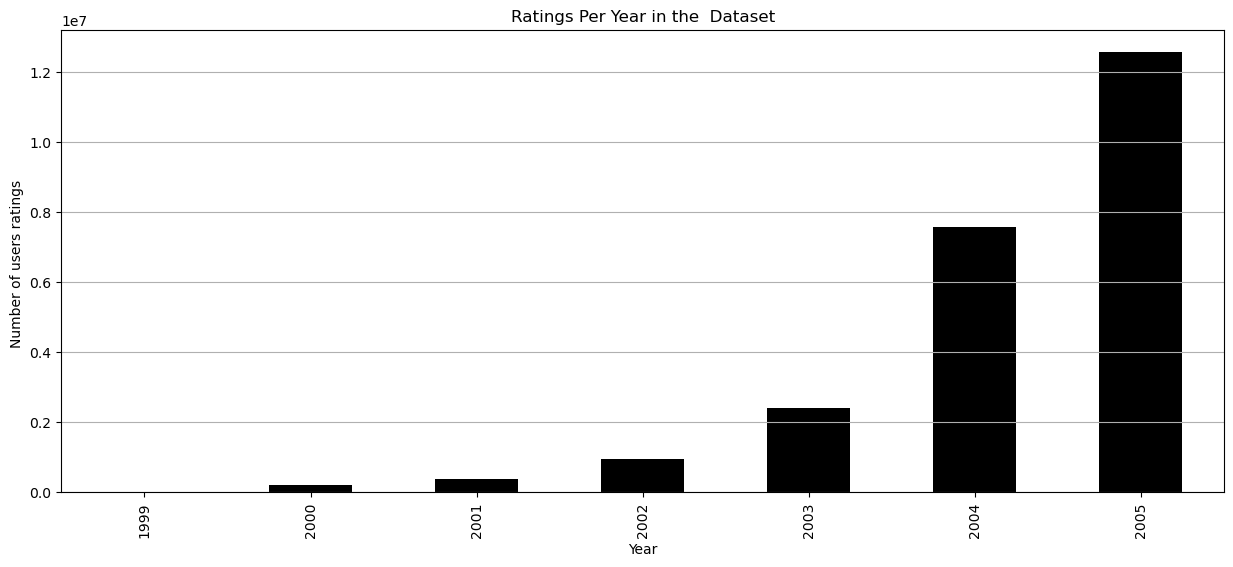

In [6]:
plt.figure(figsize=(15, 6))
df['YEAR'].value_counts().sort_index().plot(kind='bar', color='black')
plt.title('Ratings Per Year in the  Dataset')
plt.xlabel('Year')
plt.ylabel('Number of users ratings ')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Show the plot
plt.show()

##### 2003,2004,2005 have the hgihest numbers

## Sample Unique  User Trends per Year based on one sample file loaded 

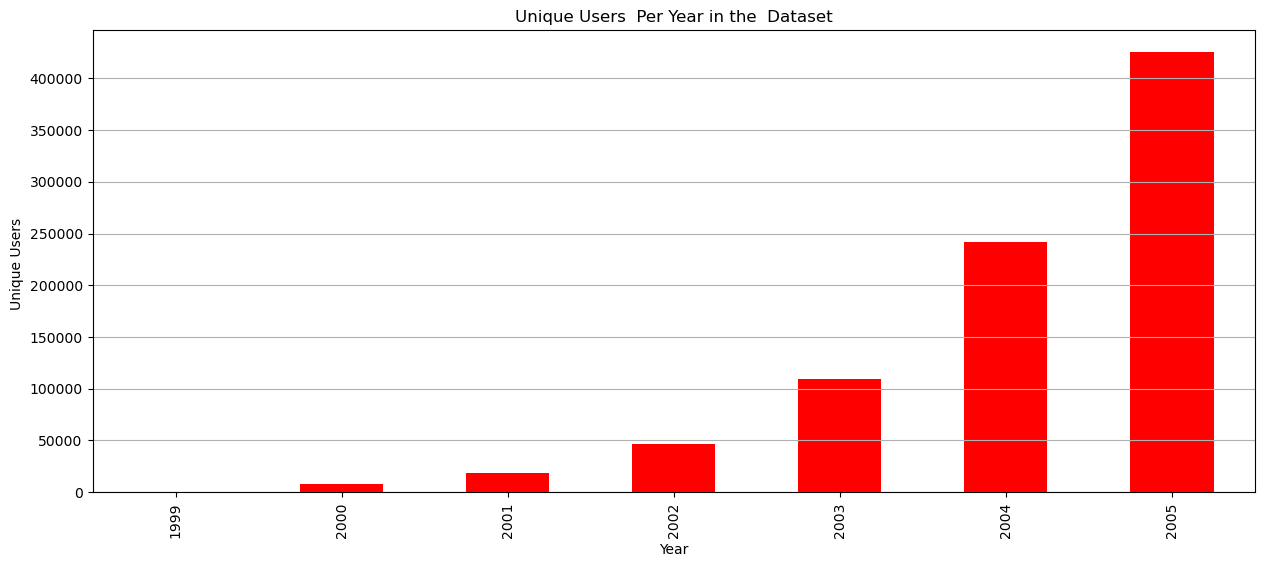

In [7]:
plt.figure(figsize=(15, 6))
df.groupby(['YEAR'])['USER_ID'].nunique().plot(kind='bar', color='RED')
plt.title('Unique Users  Per Year in the  Dataset')
plt.xlabel('Year')
plt.ylabel('Unique Users ')
        
plt.grid(axis='y')

# Show the plot
plt.show()

## Sample Rating trend Bar plot

In [10]:
bins = [0,1,2,3,4,5]
labels = ['0-1','1-2','2-3','3-4','4-5']

df['RATING_BIN'] = pd.cut(df['RATING'], bins=bins, labels=labels, include_lowest=True)



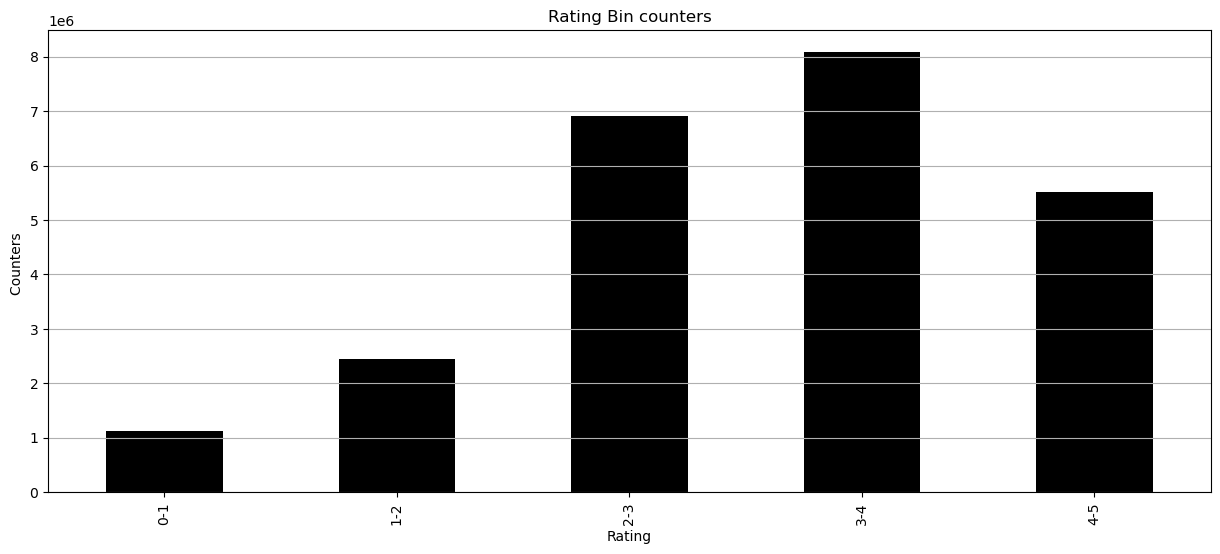

In [15]:


sns.set(style="whitegrid")

plt.figure(figsize=(15, 6))
sns.barplot(x='MovieID', y='Rating', hue='Genre', data=df, palette='Set2')

# Add title and labels
plt.title('Movie Ratings by Genre')
plt.xlabel('Movie ID')
plt.ylabel('Average Rating')

# Show the plot
plt.show()

#####  Most of the Movie Rating are between 2-3 and 3-4 

### Rating trend counter  over the years 

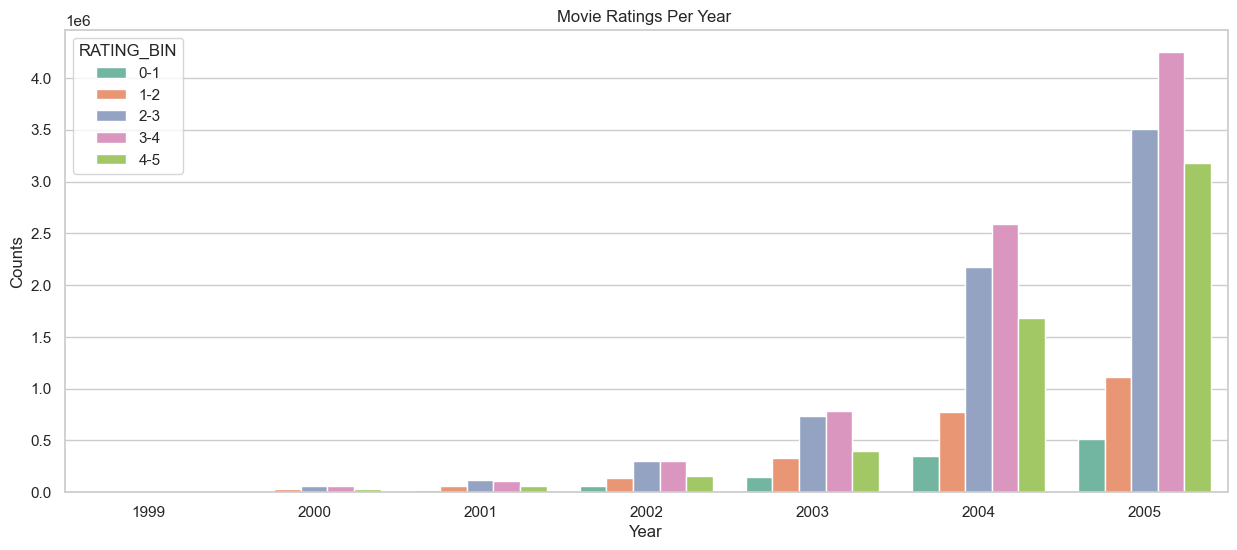

In [33]:

test1 = df.groupby(['YEAR','RATING_BIN']).agg(TOTAL =  ('RATING_BIN','count')).reset_index()


sns.set(style="whitegrid")


plt.figure(figsize=(15, 6))
sns.barplot(x='YEAR', y='TOTAL', hue='RATING_BIN', data=test1, palette='Set2')


plt.title('Movie Ratings Per Year ')
plt.xlabel('Year')
plt.ylabel('Counts')

# Show the plot
plt.show()
